<font size=5> **MTH9831 Homework3 Numerical Projects** </font>

<font size=3> **Team members:** </font>
- Chu, Gujia
- Twahir, Omar
- Wu, Chengxun
- Zhu, Bin

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The function to generate Ito's calculus

Idea: $$I_{t_j} = \sum_{i=0}^{j-1}X_{t_i}(B_{t_{i+1}}-B_{t_i})$$
where $X_{t_i}$ is the function that describe the stochastic calculus, evaluated at $(t_i, B_{t_i})$.

In [2]:
# general function for Ito w.r.t. BM
# input: total length, time step, and the function f(B_s, s)
# taking a brownian motion and a time point as input
def ito_integral_bm(T, dt, f):
    m = int(T / dt) + 1
    randomness = np.random.normal(0, np.sqrt(dt), m - 1)
    bm = np.concatenate([[0], randomness.cumsum()])
    res = [0 for _ in range(m)]
    for i in range(m - 1):
        res[i + 1] = f(bm[i], dt * i) * (bm[i + 1] - bm[i])
    return np.cumsum(res)

# Project 5.4

In this project, we consider the process $(X_t, t\in[0,1])$ with $X_t = \int_{0}^{t} B_s d B_s.$

The parameters are: discretization size 0.01.

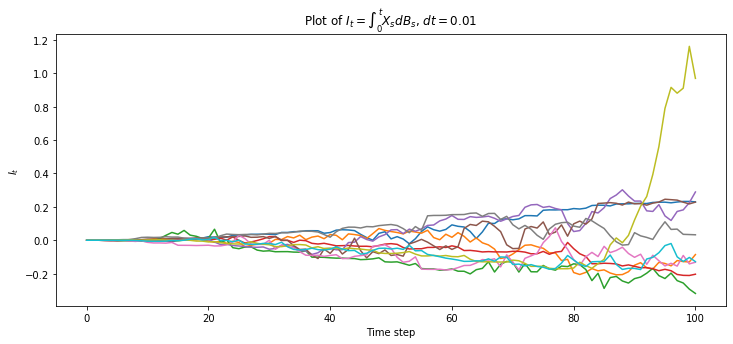

Method Empirical variance:  0.15727423752678454


In [3]:
# generate the sampling of an integral
# integral of integral, with the inner integrand f(Bt, t)

np.random.seed(42)


def generate_I(T, dt, f):
    m = int(T / dt) + 1
    randomness = np.random.normal(0, np.sqrt(dt), m - 1)
    bm = np.concatenate([[0], randomness.cumsum()])
    I_t = [0 for _ in range(m)]
    X_t = [0 for _ in range(m)]
    for i in range(m - 1):
        X_t[i + 1] = f(bm[i], dt * i) * (bm[i + 1] - bm[i]) + X_t[i]
        I_t[i + 1] = X_t[i] * (bm[i + 1] - bm[i]) + I_t[i]
    return I_t


plt.figure(figsize=(12, 5))
for _ in range(10):
    plt.plot(generate_I(
        1, 0.01,
        lambda x, y: x))  # input function f(Bt, t) = Bt to generate X_t.
plt.xlabel("Time step")
plt.ylabel("$I_t$")
plt.title("Plot of $I_t = \int_{0}^{t} X_s dB_s$, $dt=0.01$")
plt.show()

# sanity check of variance
# should approximate 1/6
print(
    "Method Empirical variance: ",
    np.array([generate_I(1, 0.01, lambda x, y: x)[-1]
              for _ in range(500000)]).std()**2)

# Project 5.7

## 5.7 (a)

Plot 100 paths of the process $Z_t = \exp(B_t^2), t\in[0,10]$, where we set $dt=0.01.$

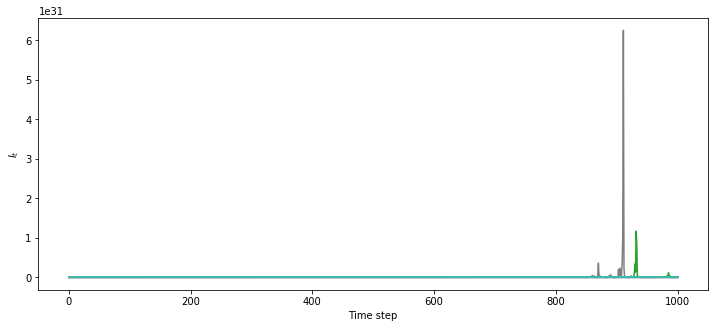

In [4]:
dt = 0.01
T = 10
m = int(T / dt) + 1
plt.figure(figsize=(12, 5))

for _ in range(100):
    randomness = np.random.normal(0, np.sqrt(dt), m)
    randomness[0] = 0
    bm = randomness.cumsum()
    tmp_path = np.exp(bm * bm)
    plt.plot(tmp_path)

plt.xlabel("Time step")
plt.ylabel("$I_t$")
plt.show()

$\textbf{Observation: }$This process is unbounded. Using different random seeds, we can always observe the large spikes that goes arbitrarily large.

## 5.7 (b)

Plot 100 paths of the process
$$
I_t = \int_{0}^{t} \exp{B_s^2} dB_s, t\in[0,10].
$$

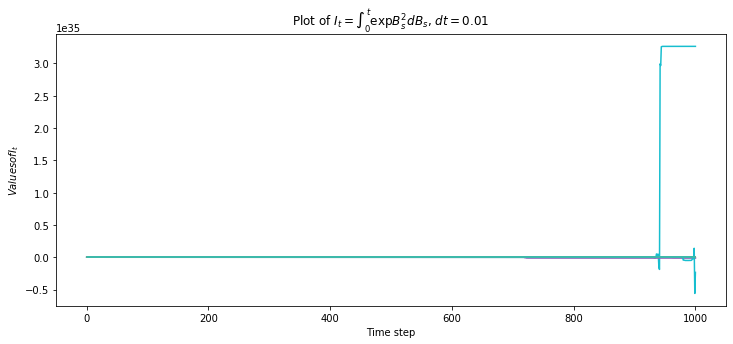

In [5]:
func_2 = lambda x, y: np.exp(x**2)

plt.figure(figsize=(12, 5))
for _ in range(100):
    plt.plot(ito_integral_bm(10, 0.01, func_2))
plt.xlabel("Time step")
plt.ylabel("$Values of I_t$")
plt.title("Plot of $I_t = \int_{0}^{t} \exp{B_s^2} dB_s$, $dt=0.01$")
plt.show()

**Comments:** the plots look quite unbounded. Hence we would conclude that when the integrand is not in $\mathcal{L}_c^2(T),$ the Ito integral is not well defined.